In [1]:
library(igraph)
library(ggplot2)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



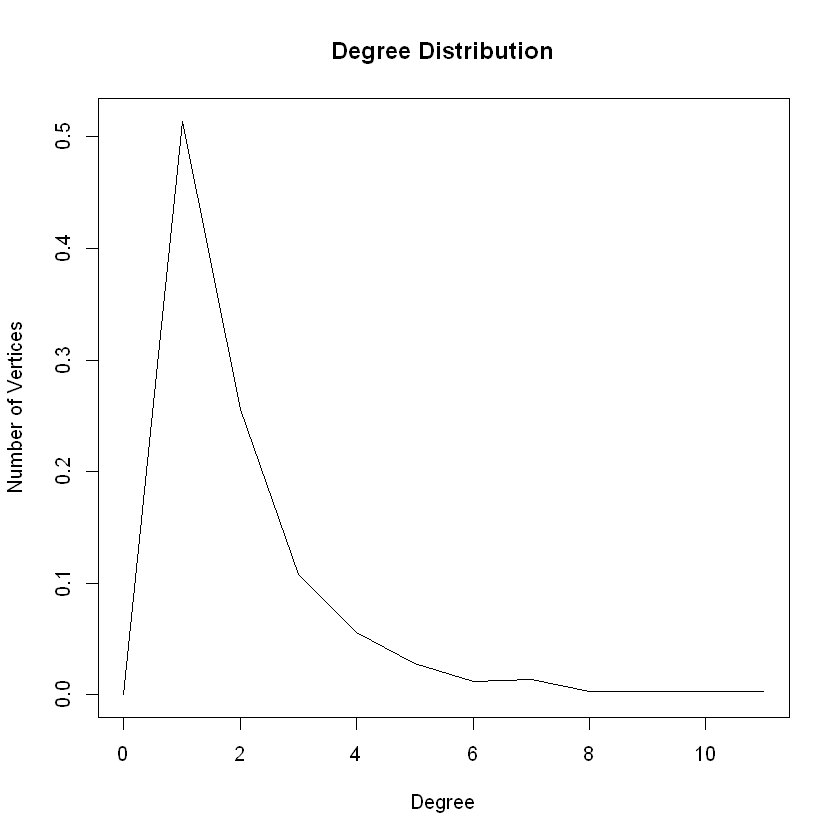

In [5]:
g_pa_age = sample_pa_age(n=1000,pa.exp = 1,aging.exp = -1,m=1 , directed=FALSE)
dd_pa_age = degree_distribution(g_pa_age)
lab1 = seq(0, length(dd_pa_age)-1)
plot(lab1, dd_pa_age, type="l", main="Degree Distribution", xlab="Degree", ylab="Number of Vertices")

In [6]:
# plot and fit the power law distribution
fit_power_law = function(graph) {
    # calculate degree
    d = degree(graph, mode = "all")
    dd = degree.distribution(graph, mode = "all", cumulative = FALSE)
    degree = 1:max(d)
    probability = dd[-1]
    # delete blank values
    nonzero.position = which(probability != 0)
    probability = probability[nonzero.position]
    degree = degree[nonzero.position]
    reg = lm(log(probability) ~ log(degree))
    cozf = coef(reg)
    power.law.fit = function(x) exp(cozf[[1]] + cozf[[2]] * log(x))
    alpha = -cozf[[2]]
    R.square = summary(reg)$r.squared
    print(paste("Alpha =", round(alpha, 3)))
    print(paste("R square =", round(R.square, 3)))
    # plot
    plot(probability ~ degree, log = "xy", xlab = "Degree (log)", ylab = "Probability (log)", 
        col = 1, main = "Degree Distribution")
    curve(power.law.fit, col = "red", add = T, n = length(d))
}


[1] "Alpha = 2.463"
[1] "R square = 0.94"


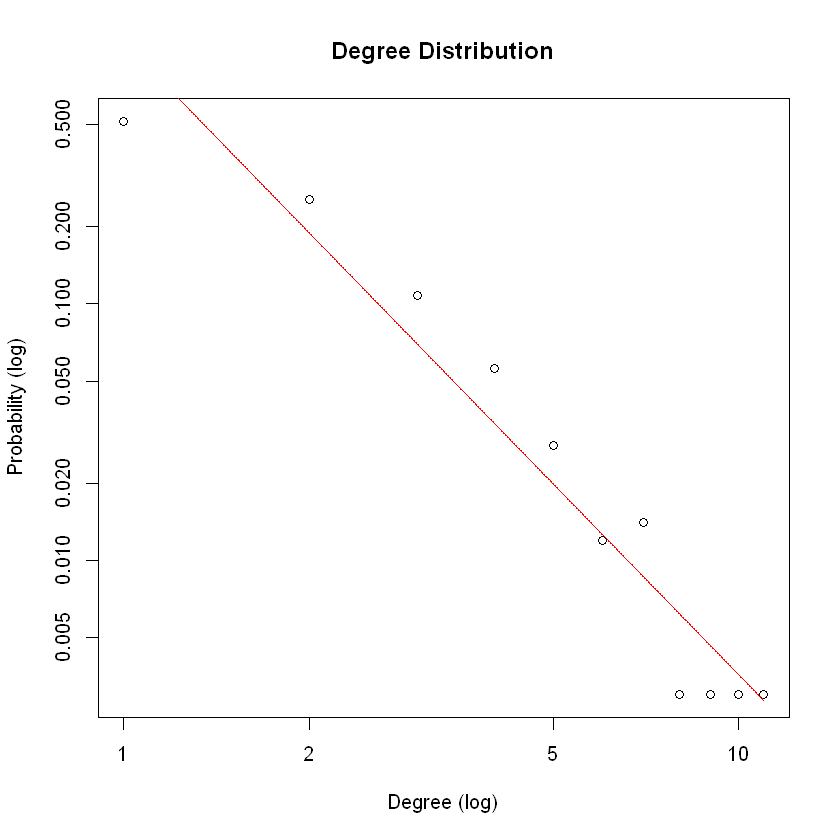

In [7]:
fit_power_law(g_pa_age)

[1] "Alpha = 2.463"
[1] "R square = 0.94"


NULL

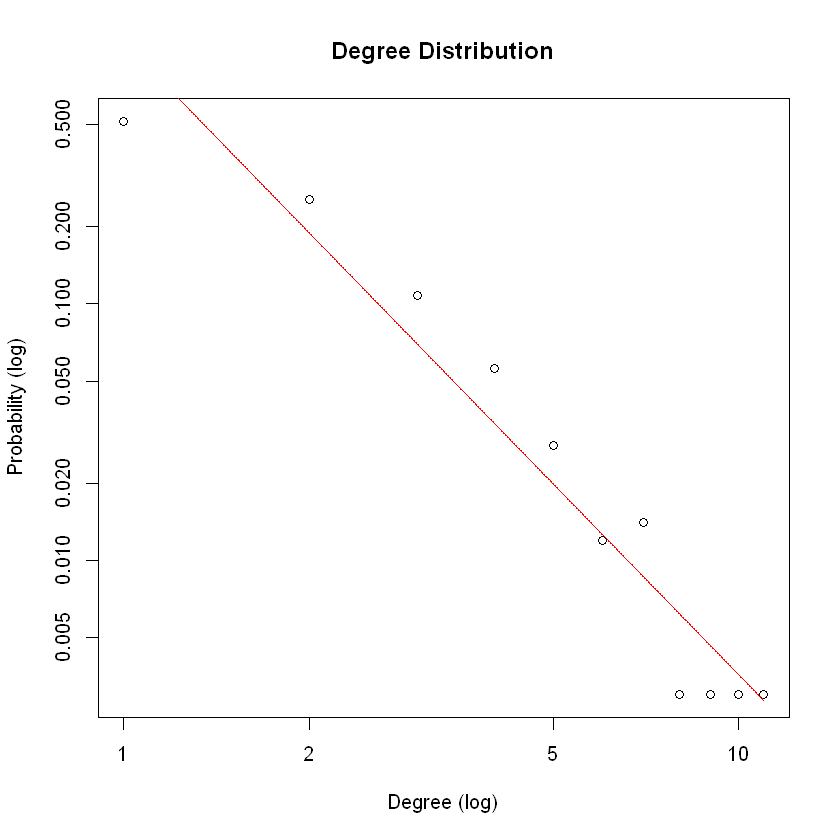

In [11]:
fit1 <- fit_power_law(g_pa_age)
fit1$alpha

In [13]:

r1 = cluster_fast_greedy(g_pa_age, merges = FALSE, modularity = FALSE, membership = TRUE)
r1_mem = membership(r1)
modularity(g_pa_age, r1_mem)

[1] 0.934452

In [14]:
#Part 2
#Question 1

N = 1000
erdos_graph = erdos.renyi.game(N, p.or.m=0.01, type="gnp")

In [15]:
erdos_transitions = create_transition_matrix(erdos_graph)

ERROR: Error in create_transition_matrix(erdos_graph): could not find function "create_transition_matrix"
